# Chemical profile diagram
In this notebook we demonstrate how to create a chemical profile diagram with `tulips`. This diagram is useful when you are interested in the composition of a stellar model. It will not only show which isotopes are present, but also how the composition differs from the center to the edge of the stellar object. Similar to the other diagrams, `tulips` represents the stellar object as a circle, divided into rings. To show the interior composition, `tulips` uses nested pie-charts. For every ring, it shows the mass fraction of each isotope present in that layer by using different colors. Let's try and create an example chemical profile diagram. 

### Load an example model
At first, we have to load the history output of a MESA model. Here we load the `history.data` file of a $11  M_{\odot}$ stellar model into object `m11`: 

In [1]:
# Interactive matplotlib plotting for jupyter lab
%matplotlib inline

# If you use jupyter notebook
# %matplotlib notebook

import matplotlib.pyplot as plt
import mesaPlot as mp

import tulips

# Specify directory of MESA model
SINGLE_M11_DIR = "../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS/"

m11 = mp.MESA()
m11.loadHistory(f=SINGLE_M11_DIR)

<div class="alert alert-warning">

Warning
    
As explained in the [Getting Started](getting_started.ipynb#Loading-a-MESA-model) page, MESA produces two types of output: `history.data` and `profile.data` files. When making a chemical profile diagram, make sure that both of these types of files are stored in the model.

</div>

In [2]:
# # Use LaTeX in the plots
col_w = 3.5    # Figure width in inches, columnswidth
text_w = 7.25 # Full page figure width
plt.rcParams.update({
    'figure.figsize': (col_w, col_w/(4/3.)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 9,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    ),
    'figure.dpi': 200,
})

import warnings
warnings.filterwarnings("ignore")

### Plotting the chemical profile 
We produce a chemical profile diagram of our stellar model with the `tulips.chemical_profile` function. As arguments it requires our `mesaPlot` object `m11`, and a time index. Here, we plot a model halfway its lifetime by setting `time_ind=1000`. Have a look at the [Getting Started](getting_started.ipynb#Creating-your-first-tulips-diagram) page for more information about how to use `time_ind`.  

../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS///profile102.data


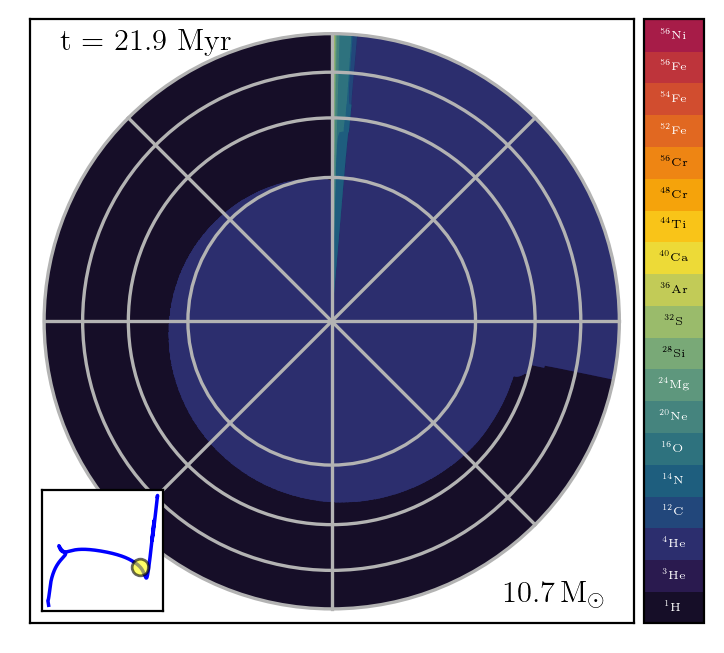

In [3]:
tulips.chemical_profile(m11,time_ind=1000)
plt.show()

This diagram shows us a stellar model, represented by a circle that is divided into nested pie-charts. You can specify the minimum width of a nested pie-chart ring with the `width` keyword. The colors indicate which element is present in a certain region in its interior, as shown in the colorbar on the right.  It is possible to choose which elements you want to include. To do this, you can specify a list with isotope names through the `isotope_list` option. 

### Reading the diagram
The radius of the cirle is proportional to the square root of the enclosed mass. Accordingly, the area covered by a color is proportional to the total mass of that element. The grey circles help to visualize this, since they indicate the regions that account for 25, 50, 75 and 100% of the total mass. You can hide these circles with `show_ring_annotations = False`. In this example, we see a star whose outer layers consists for almost 75% of hydrogen and 25% of helium. However, the inner layers contain almost only helium. There is also a small part with heavier elements that come from the initial composition of the star.

<div class="alert alert-info">

Note
    
It is possible to change what is represented by the radius with the `raxis` keyword. However, this is not recommended since it will make the diagram less intuitive and difficult to interpret. `tulips` automatically shows the square root of that quantity, which will make it hard to read the diagram. 

</div>

### Adjusting the diagram
By default, `tulips` creates pie-charts in a counterclockwise direction, beginning from an angle of 90 degrees from the horizontal axis. It is possible to change these settings by modifying the `counterclock` and `startangle` variables. Elements are plotted with a certain order. For each pie chart, `tulips` first plots the element that has the lowest mass number (hydrogen), and continues with heavier ones, ending with e.g. iron. 

It is possible to scale the diagram. This can be useful if you are, for example, only interested in the composition in the core. You can do this by changing the `scale` variable, which gives the value to scale the circle to. The radius of the circle will be $\sqrt{M_{\textrm{star}}}/ \sqrt{\textrm{scale}}$. 

### Creating your own colorbar
It is possible to create your own colorbar that is shown in the diagram. To do this, you can either change the colorbar settings in the `chemical_profile` function, or use the `tulips.create_elem_colorbars` function. Here, we demonstrate the latter. The function requires an isotope list that contains the elements that you want to include in the colorbar. To get all isotopes that are stored in a MESA model, you can use the `get_isotopes` and the `get_isotopes_from_prof` functions. The first one returns all elements in a MESA object, for example in our `m11` object:

In [4]:
isotope_list = tulips.get_isotopes(m11)
print(isotope_list)

['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'cr56', 'fe52', 'fe54', 'fe56', 'ni56']


Alternatively, `get_isotopes_from_prof` only returns the elements in a single profile. This can be useful because loading all profiles is computationally expensive. To use this function, we load the first profile in the `m11` object with `m11.loadProfile(num=1)`. Then we use this profile, which can be accessed with `m11.prof`, as argument of the `get_isotopes_from_prof` function: 

In [5]:
m11.loadProfile(num=1)
profile_isotope_list = tulips.get_isotopes_from_prof(m11.prof)
print(profile_isotope_list)

../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS///profile1.data
['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'cr56', 'fe52', 'fe54', 'fe56', 'ni56']


<div class="alert alert-info">

Note
    
In the example above, you can see that the first profile contains the same list of isotopes as in the complete `m11` object. This is because MESA keeps track of isotopes during the entire calculations. Often, in the beginning of a star's life, small amounts of the heavier elements are already present (dependent on the star's metallicity). It is possible to check these amounts throughout the star at a particular moment in time, for example for C-12, with `m11.prof.c12` or, alternatively, with `m11.prof.data['c12']`.  

</div>

Now let's create a customized colorbar with these isotopes. To see how you can change the colormap, have a look at the [Customize options](customize.ipynb#Colormap) page. It is also possible to specify how many elements you would like to show on the colorbar. With the `min_cbar_elem` and `max_cbar_elem` properties, you can manage the minimum and maximum amount of isotopes in one colorbar. To change the orientation of the colorbar, you can set `orientation` to `'horizontal'`. In the following example we first create a `chemical_profile` diagram, without a colorbar. Then we plot a customized colorbar with the `create_elem_colorbars` function on the existing `ax` object. 

<div class="alert alert-info">

Note
    
Make sure to use the same colormap in your diagram and in your customized colorbar, otherwise the colors in the diagram will not correspond to the colorbar.

</div>

../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS///profile102.data


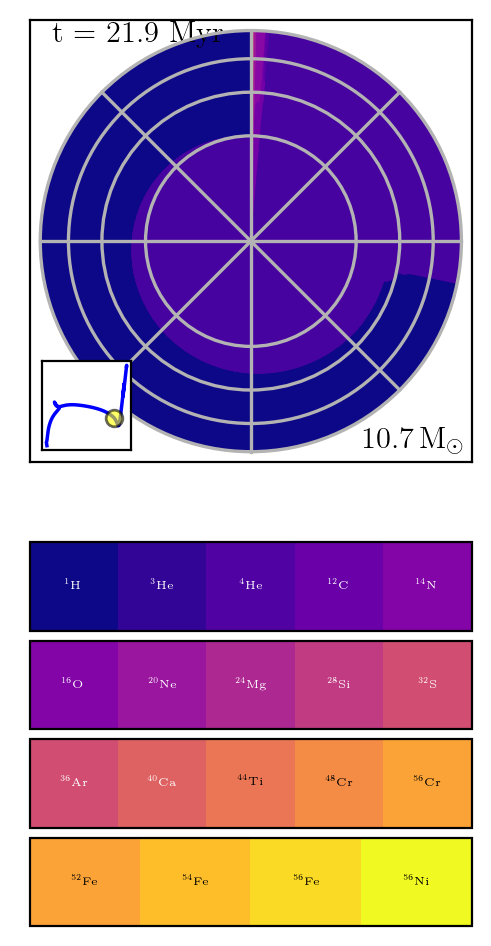

In [6]:
fig, ax = tulips.chemical_profile(m11, time_ind=1000, show_colorbar=False, cmap='plasma', fig_size=(8,6))
tulips.create_elem_colorbars(isotope_list, ax, cmap='plasma', min_cbar_elem=4, max_cbar_elem=5, orientation='horizontal')
plt.show()

As expected, `tulips` produced a horizontal colorbar with a minimum of 4, and a maximum of 5 elements, with the specified `matplotlib 'plasma'` colormap. 

### Creating an animation 
To create an animation of a chemical profile diagram and see how the composition of the stellar model changes over time, you have to change the `time_ind` option. In the following example, we produce an animation from the first(0) to the last(-1) MESA model, calculated for 300 layers. It is saved in a file called `chemical_profile.mp4`, as specified with the `output_fname` keyword. You can specify the speed of the video with the `fps` (frames per second) option. It might take some time to create the animation! 

<div class="alert alert-warning">

Warning
    
The amount of profiles stores in the `profile.data` file can be small. When making an animation, make sure that enough profile output has been saved to show a meaningful time evolution of the composition. You can check when profiles are saved with `m11.prof_ind['model']`. This returns a list of indices that indicate at which MESA model number a profile is saved. You can use this to see how many profiles you have and if they cover the evolutionary stages you are interested in. 
    
</div>

In [ ]:
tulips.chemical_profile(m11, time_ind=(0,-1), fps=30, num_rings=300, output_fname='chemical_profile', cmap=tulips.CMAP_BASE)
plt.show()

In [7]:
from IPython.display import Video

Video("chemical_profile.mp4", embed=True, width=700, height=600)

During the first part of the animation, we clearly see the composition of the inner layers change from hydrogen (light blue) to helium (blue) because of nuclear burning. Then, after a the hydrogen shell burning phase where not much changes in the composition, the next stage of nuclear burning starts, which increases the carbon and oxygen mass in the core. In the same manner, the effect of all evolutionary stages on the composition can be observed in the animation. 